In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.patches as mpatches

# File Paths
DATA_DIR = "/content/drive/MyDrive/266_final_project/data/full_dataset"
EMOTION_FILE = "/content/drive/MyDrive/266_final_project/data/emotions.txt"
SENTIMENT_DICT = "/content/drive/MyDrive/266_final_project/data/sentiment_dict.json"

In [3]:
# Load CSVs
dfs = [pd.read_csv(os.path.join(DATA_DIR, f)) for f in os.listdir(DATA_DIR) if f.endswith(".csv")]
data = pd.concat(dfs)
print(f"{len(set(data['id']))} unique examples")
print(f"{len(data)} total annotations")

58011 unique examples
211225 total annotations


In [4]:
# Load emotions and sentiment dictionary
with open(EMOTION_FILE, "r") as f:
    all_emotions = f.read().splitlines()
all_emotions_neutral = all_emotions + ["neutral"]

with open(SENTIMENT_DICT) as f:
    sent_dict = json.load(f)

Label distributions (%):
neutral           26.61
neutral           26.61
approval           8.48
admiration         8.24
annoyance          6.55
gratitude          5.59
disapproval        5.50
curiosity          4.66
amusement          4.45
realization        4.23
optimism           4.19
disappointment     4.08
love               3.94
anger              3.89
joy                3.84
confusion          3.54
sadness            3.25
caring             2.89
excitement         2.71
surprise           2.65
disgust            2.55
desire             1.84
fear               1.54
remorse            1.22
embarrassment      1.19
nervousness        0.87
pride              0.63
relief             0.62
grief              0.32
dtype: float64


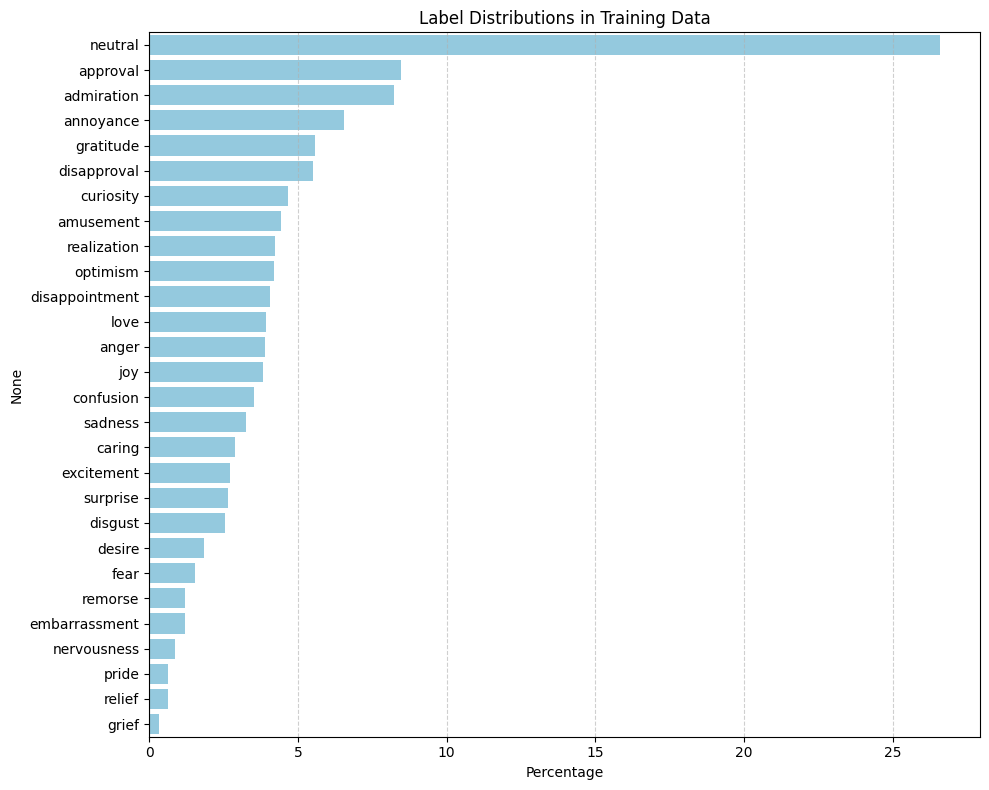

In [5]:
# Filter invalid examples
data = data[data[all_emotions_neutral].sum(axis=1) != 0]

# Label distribution
print("Label distributions (%):")
label_dist = (data[all_emotions_neutral].sum(axis=0).sort_values(ascending=False) / len(data) * 100).round(2)
print(label_dist)

# Plot label distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=label_dist.values, y=label_dist.index, color='skyblue')
plt.xlabel("Percentage")
plt.title("Label Distributions in Training Data")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

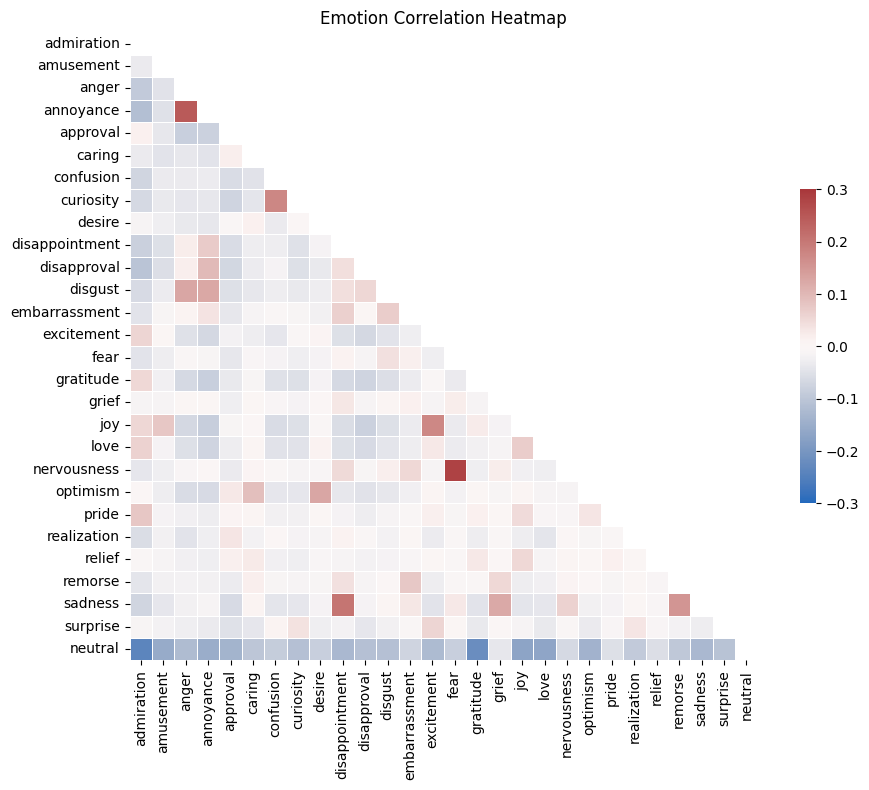

In [6]:
# Correlation matrix
ratings = data.groupby("id")[all_emotions].mean()
corr = ratings.corr()

# Heatmap of correlations
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap="vlag", vmax=0.3, vmin=-0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title("Emotion Correlation Heatmap")
plt.tight_layout()
plt.show()

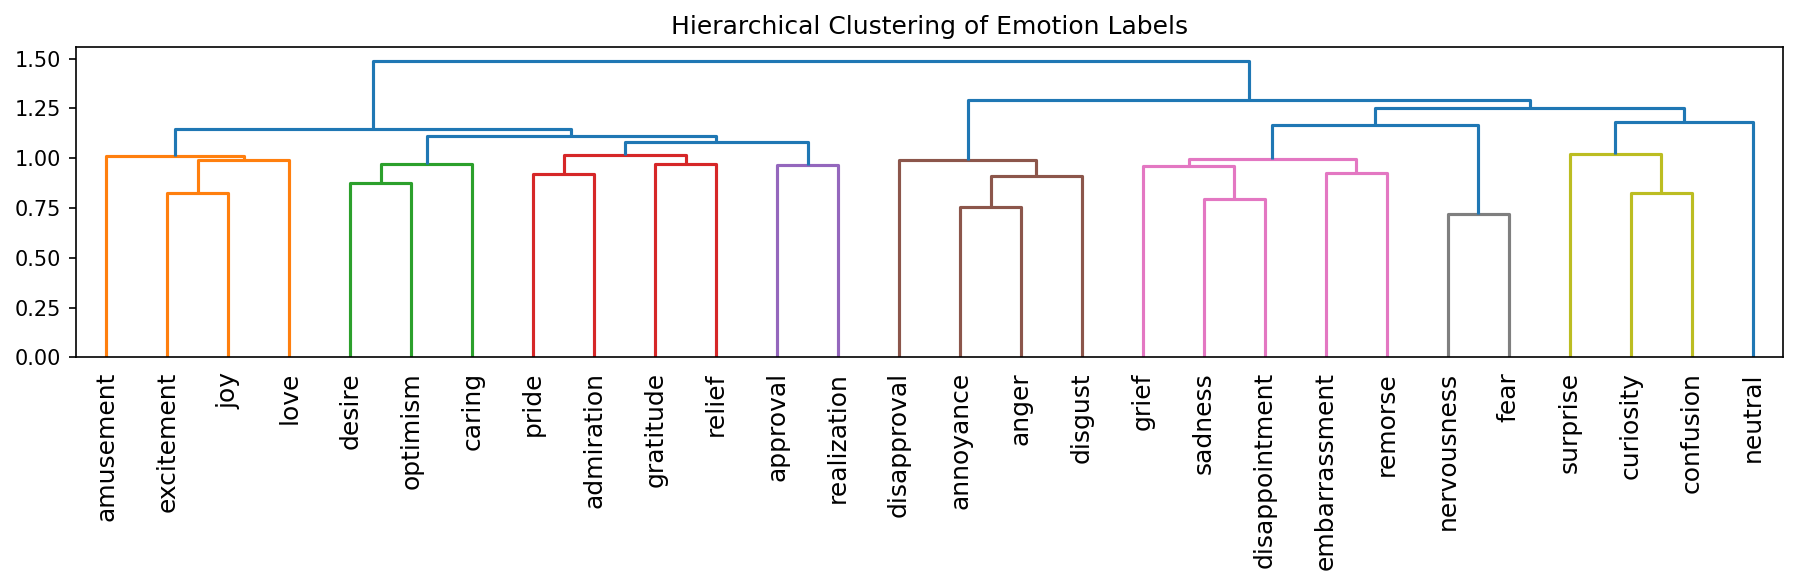

In [7]:
# Hierarchical clustering
z = linkage(pdist(ratings.T, metric="correlation"), method="ward", optimal_ordering=True)
plt.figure(figsize=(12, 4), dpi=150)
dendrogram(z, labels=ratings.columns, leaf_rotation=90, leaf_font_size=12, color_threshold=1.05)
plt.title("Hierarchical Clustering of Emotion Labels")
plt.tight_layout()
plt.show()

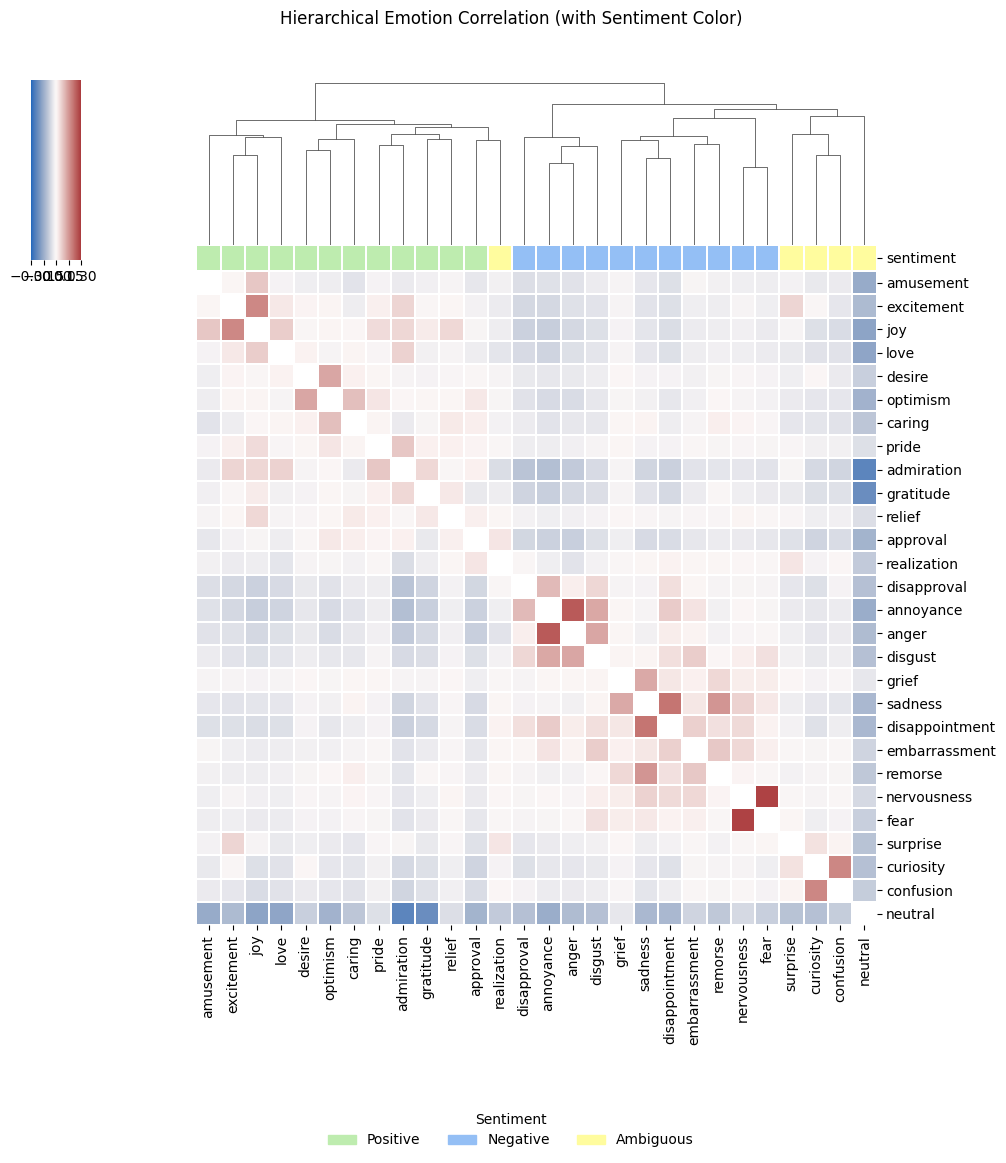

In [8]:
sent_color_map = {
    "positive": "#BEECAF",
    "negative": "#94bff5",
    "ambiguous": "#FFFC9E"
}

sent_colors = {e: sent_color_map.get(next((k for k in sent_dict if e in sent_dict[k]), "ambiguous")) for e in all_emotions}
row_colors = pd.Series(corr.columns, index=corr.columns, name="sentiment").map(sent_colors)

g = sns.clustermap(
    corr,
    mask=np.eye(len(corr), dtype=bool),
    cmap="vlag",
    vmax=.3, vmin=-.3, center=0,
    row_linkage=z, col_linkage=z,
    col_colors=row_colors,
    linewidths=.1,
    cbar_kws={"ticks": [-.3, -.15, 0, .15, .3], "orientation": "horizontal"},
    figsize=(10, 10)
)
g.ax_row_dendrogram.set_visible(False)
g.fig.suptitle("Hierarchical Emotion Correlation (with Sentiment Color)", y=1.05)
legend_patches = [mpatches.Patch(color=color, label=label.capitalize()) for label, color in sent_color_map.items()]
g.fig.legend(handles=legend_patches, title="Sentiment", loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.show()

In [9]:
data

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,We can hope,ee3o3ko,darkenseyreth,EdmontonOilers,t3_ag4r9j,t1_ee3mhad,1.547529e+09,62,False,0,...,0,0,1,0,0,0,0,0,0,0
1,Shhh don't give them the idea!,eebl3z7,BoinkBoinkEtAliae,MurderedByWords,t3_ah3o76,t1_eeb68lo,1.547777e+09,76,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"Thank you so much, kind stranger. I really nee...",ed4fe9l,savageleaf,raisedbynarcissists,t3_abwh00,t1_ed4etbj,1.546482e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
3,Ion know but it would be better for you to jus...,efavtdu,CADDiLLXC,darknet,t3_al4njw,t3_al4njw,1.548800e+09,62,False,0,...,0,0,0,0,0,0,0,0,0,1
4,I'm honestly surprised. We should have fallen ...,ee2imz2,CorporalThornberry,CollegeBasketball,t3_afxt6t,t1_ee22nyr,1.547497e+09,55,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71219,"Well, I'm glad you're out of all that now. How...",ed89acy,pompompompi,raisedbynarcissists,t3_ac9etw,t1_ed7gt8x,1.546615e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,0
71220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,False,0,...,1,0,0,0,0,0,0,0,0,0
71221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,False,0,...,0,0,0,0,0,0,0,0,0,0
71222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,False,1,...,0,0,0,0,0,0,0,0,0,0
